In [116]:
import pandas as pd

# 假设文件名为data.txt，先读取数据
data = pd.read_csv('score.txt', header=None)

# 显示前几行数据查看格式
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,2023,125200,公共管理,专业型硕士,上海海洋大学,NaN,175,44,0,88,0,NaN
1,2023,095137,农业管理,专业型硕士,上海海洋大学,NaN,251,33,33,50,50,NaN
2,2023,095135,食品加工与安全,专业型硕士,上海海洋大学,NaN,251,33,33,50,50,NaN
3,2023,095134,渔业发展,专业型硕士,上海海洋大学,NaN,251,33,33,50,50,NaN
4,2023,086000,生物与医药,专业型硕士,上海海洋大学,NaN,273,38,38,57,57,NaN


In [117]:
# 为数据添加列名
columns = ['年份', '代码', '专业', '类型', '学校', 'NaN','国家线', '英语线', '政治线', '数学线', '专业线','NaN']
data.columns = columns

# 删除 'NaN' 列，因为没有实际意义
data = data.drop(columns=['NaN'])

# 查看处理后的数据
data.head()


,年份,代码,专业,类型,学校,国家线,英语线,政治线,数学线,专业线
0,2023,125200,公共管理,专业型硕士,上海海洋大学,175,44,0,88,0
1,2023,095137,农业管理,专业型硕士,上海海洋大学,251,33,33,50,50
2,2023,095135,食品加工与安全,专业型硕士,上海海洋大学,251,33,33,50,50
3,2023,095134,渔业发展,专业型硕士,上海海洋大学,251,33,33,50,50
4,2023,086000,生物与医药,专业型硕士,上海海洋大学,273,38,38,57,57


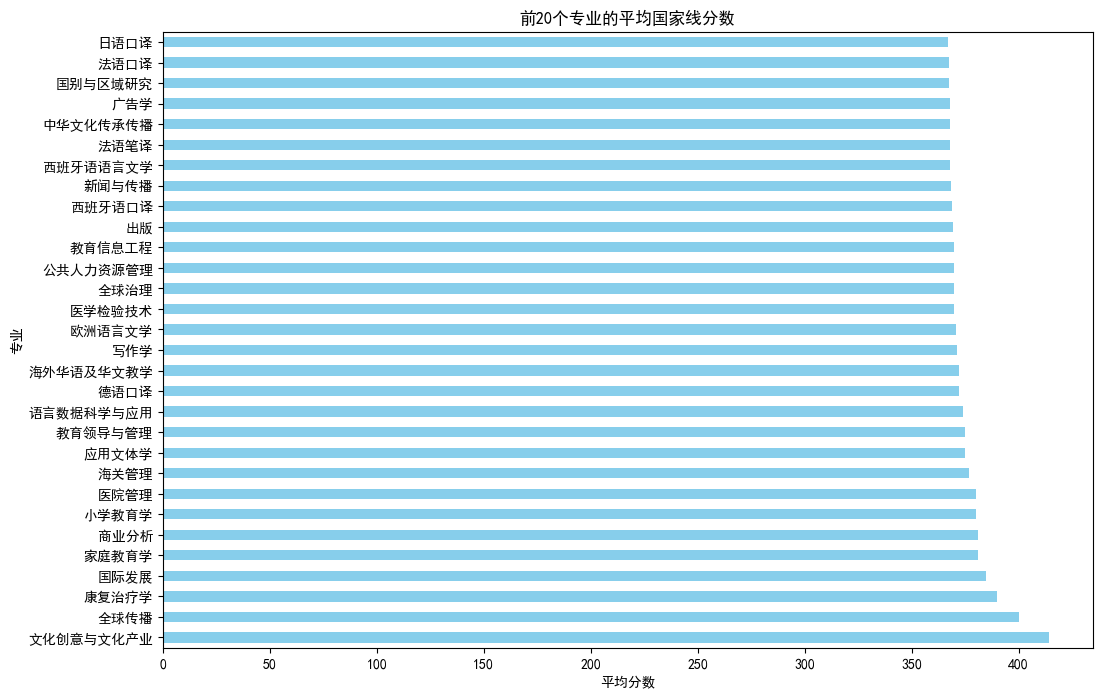

In [118]:
import matplotlib.pyplot as plt
import matplotlib

# 设置matplotlib使用SimHei字体，解决中文显示问题
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 按学科计算平均国家线分数
average_scores = data.groupby('专业')['国家线'].mean()

# 选取前20个专业
top_20_majors = average_scores.sort_values(ascending=False).head(30)

# 绘制柱状图
plt.figure(figsize=(12, 8))
top_20_majors.plot(kind='barh', color='skyblue')
plt.title('前20个专业的平均国家线分数')
plt.xlabel('平均分数')
plt.ylabel('专业')

# 设置y轴标签的字体大小并旋转
plt.yticks(fontsize=10, rotation=0)  # 设置字体大小为10，并旋转0度

plt.show()


In [119]:
# 计算每个学科的平均成绩
data['AverageScore'] = data[['国家线']].mean(axis=1)

# 按学科计算平均分
average_scores = data.groupby('专业')['AverageScore'].mean()

# 数据描述
description = data.describe()

# 打印数据描述结果
print(description)

# 打印按学科的平均分描述
print(average_scores.describe())


            年份           国家线           英语线           政治线           数学线  \
count  29541.0  29541.000000  29541.000000  29541.000000  29541.000000   
mean    2023.0    305.753224     42.140313     39.942284     77.341999   
std        0.0     45.229356      8.141653     11.964847     29.568206   
min     2023.0    150.000000      0.000000      0.000000      0.000000   
25%     2023.0    273.000000     38.000000     38.000000     57.000000   
50%     2023.0    300.000000     39.000000     39.000000     70.000000   
75%     2023.0    346.000000     48.000000     48.000000     88.000000   
max     2023.0    420.000000     90.000000     66.000000    264.000000   

                专业线  AverageScore  
count  29541.000000  29541.000000  
mean      48.936157    305.753224  
std       29.998357     45.229356  
min        0.000000    150.000000  
25%       45.000000    273.000000  
50%       57.000000    300.000000  
75%       71.000000    346.000000  
max      138.000000    420.000000  
count    

In [120]:
# 按学科计算平均分
average_scores = data.groupby('专业')['AverageScore'].mean()

# 查看学科的平均成绩描述
average_scores_description = average_scores.describe()
print(average_scores_description)


count    1561.000000
mean      305.401128
std        37.117221
min       180.956522
25%       273.000000
50%       296.000000
75%       340.000000
max       414.000000
Name: AverageScore, dtype: float64


In [121]:
# 假设data已经加载并且包含相关列
# 选择数据框中数值类型的列
numeric_columns = data.select_dtypes(include=['number']).columns

# 使用选中的数值列计算相关性矩阵
correlation_matrix = data[numeric_columns].corr()

# 打印相关性矩阵
correlation_matrix


,年份,国家线,英语线,政治线,数学线,专业线,AverageScore
年份,NaN,NaN,NaN,NaN,NaN,NaN,NaN
国家线,NaN,1.000000,0.480772,0.784263,0.180693,0.438864,1.000000
英语线,NaN,0.480772,1.000000,0.572271,0.455450,0.346776,0.480772
政治线,NaN,0.784263,0.572271,1.000000,0.215415,0.535760,0.784263
数学线,NaN,0.180693,0.455450,0.215415,1.000000,-0.559729,0.180693
专业线,NaN,0.438864,0.346776,0.535760,-0.559729,1.000000,0.438864
AverageScore,NaN,1.000000,0.480772,0.784263,0.180693,0.438864,1.000000


In [122]:
missing_values = data.isnull().sum()
print(missing_values)

年份              0
代码              0
专业              0
类型              0
学校              0
国家线             0
英语线             0
政治线             0
数学线             0
专业线             0
AverageScore    0
dtype: int64


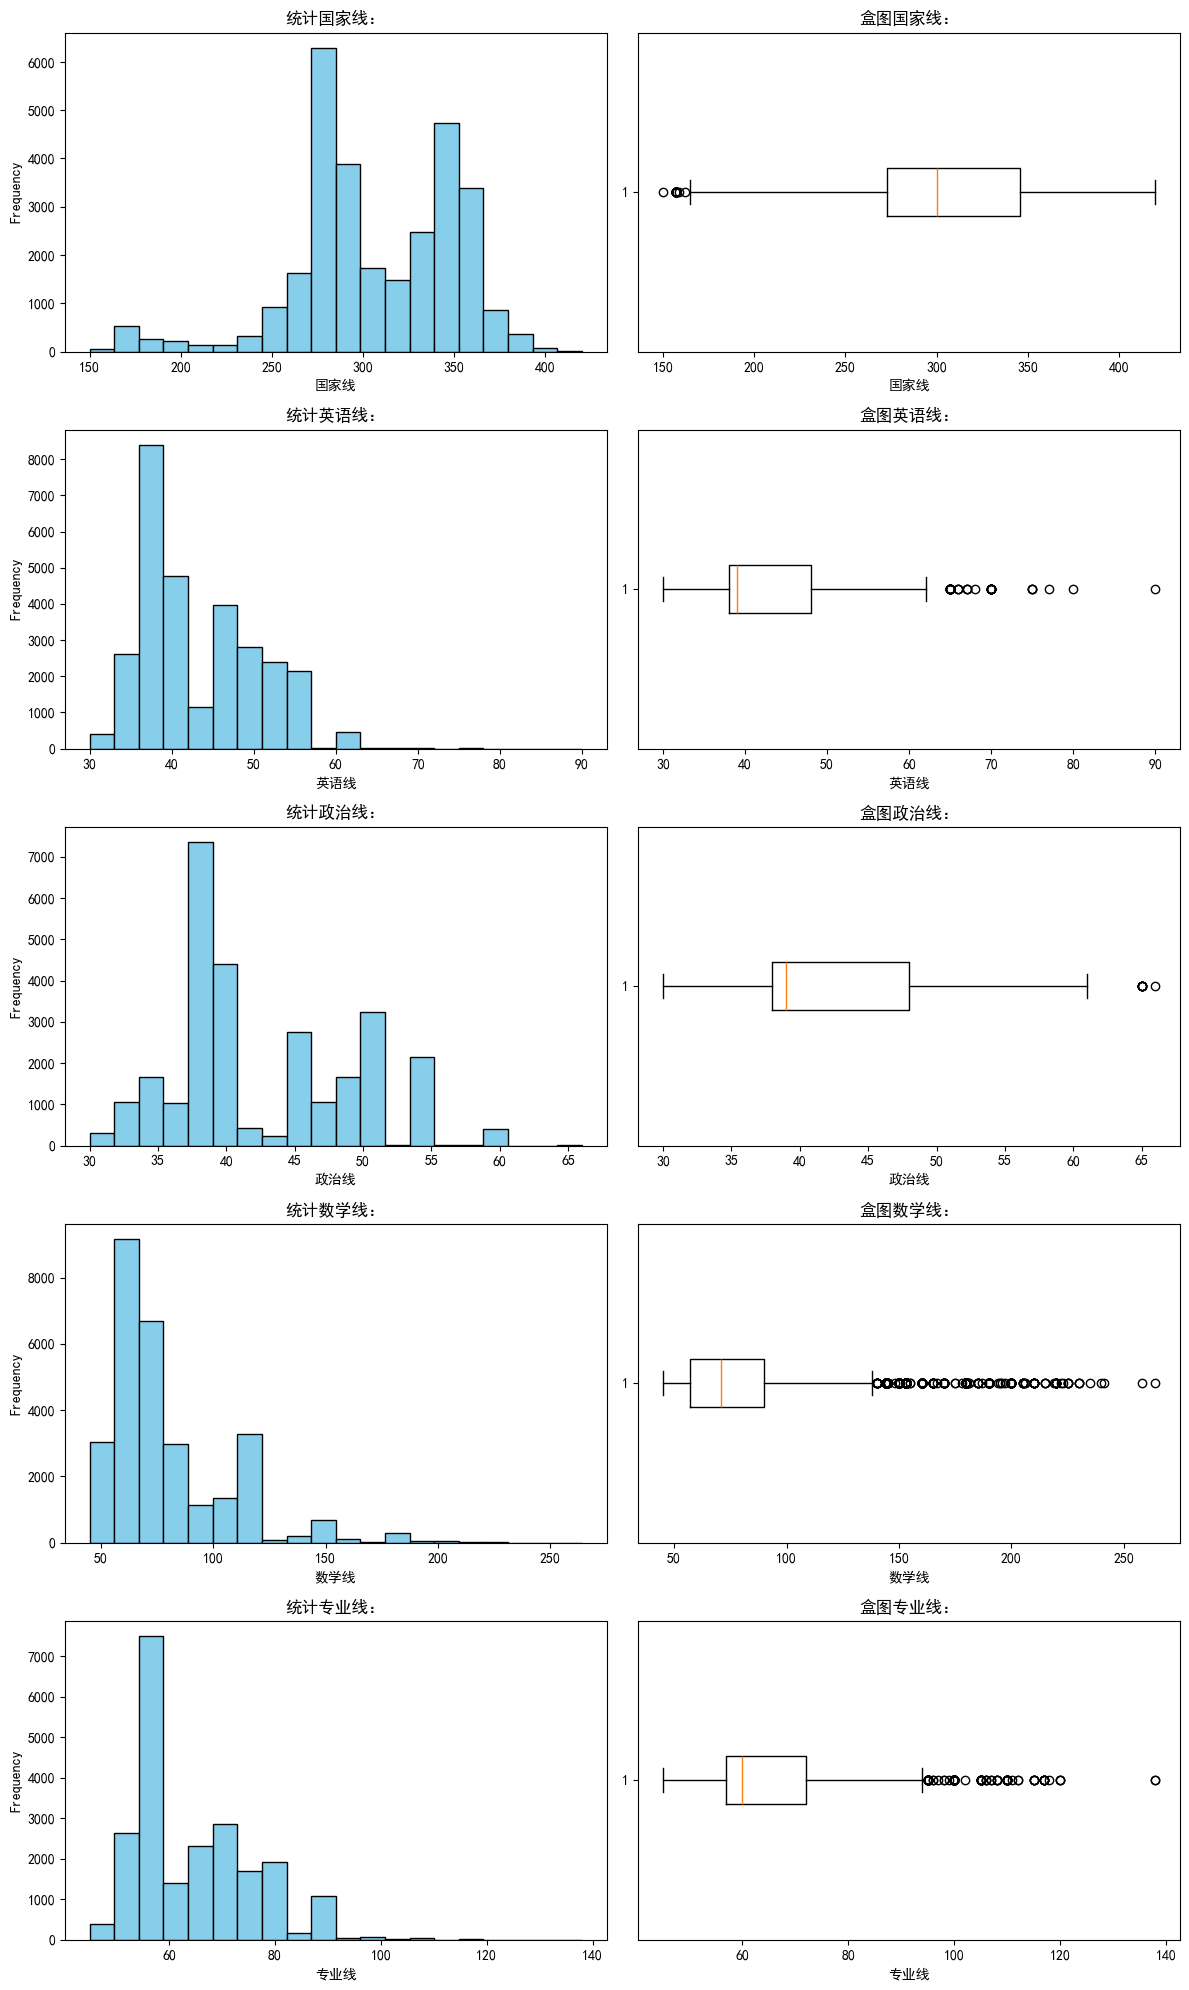

In [123]:
import matplotlib.pyplot as plt

# 列出要绘制的列名
score_columns = ['国家线', '英语线', '政治线', '数学线', '专业线']

# 设置子图的行列数
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

# 遍历每个要绘制的列
for i, column in enumerate(score_columns):
    # 排除掉值为0的数据
    column_data = data[column].loc[data[column] != 0]
    
    # 绘制直方图
    axes[i, 0].hist(column_data, bins=20, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'统计{column}：')
    axes[i, 0].set_xlabel(f'{column}')
    axes[i, 0].set_ylabel('Frequency')
    
    # 绘制箱线图
    axes[i, 1].boxplot(column_data, vert=False)
    axes[i, 1].set_title(f'盒图{column}：')
    axes[i, 1].set_xlabel(f'{column}')

# 调整布局，使得图形不重叠
plt.tight_layout()
plt.show()


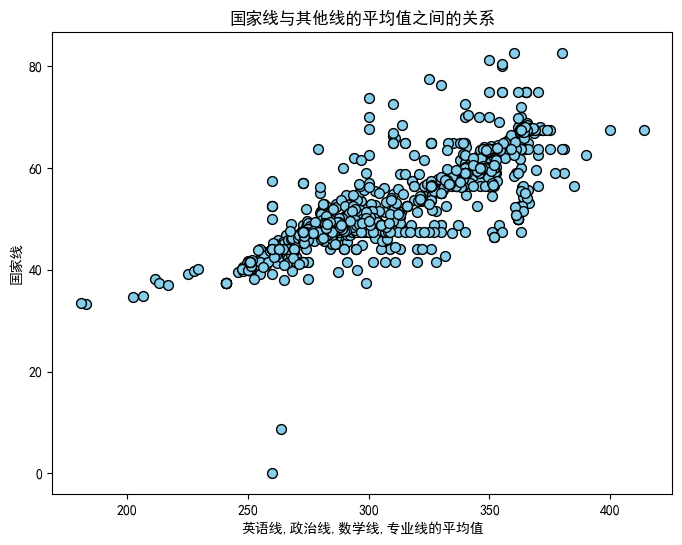

In [130]:
import matplotlib.pyplot as plt

# 按专业计算 '国家线' 和其他四个线（'英语线', '政治线', '数学线', '专业线'）的平均值
avg_scores = data.groupby('专业')[['国家线', '英语线', '政治线', '数学线', '专业线']].mean()

# 获取其他四个线的平均值列
x = avg_scores['国家线']  # 每个专业的国家线
y = avg_scores[['英语线', '政治线', '数学线', '专业线']].mean(axis=1)  # 每个专业的四个线的平均值

# 绘制二维散点图
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='skyblue', edgecolor='black', s=50)  # s=50 为点的大小
plt.title('国家线与其他线的平均值之间的关系')
plt.xlabel('英语线,政治线,数学线,专业线的平均值')
plt.ylabel('国家线')

# 显示图形
plt.show()


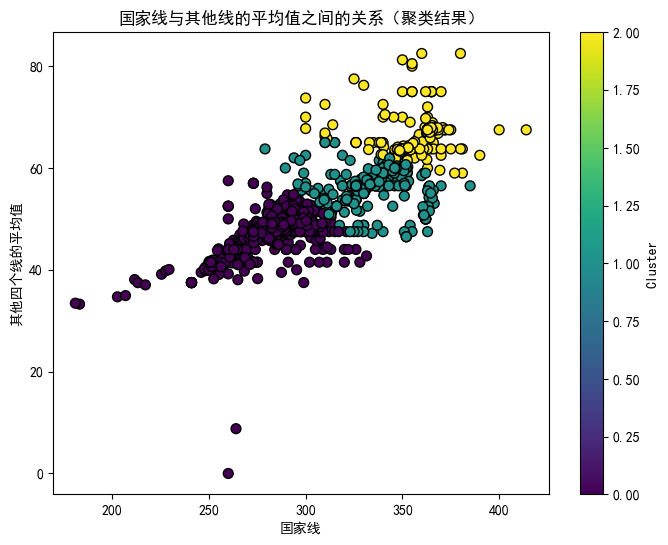

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 按专业计算 '国家线' 和其他四个线（'英语线', '政治线', '数学线', '专业线'）的平均值
avg_scores = data.groupby('专业')[['国家线', '英语线', '政治线', '数学线', '专业线']].mean()

# 获取国家线和其他四个线的平均值
x = avg_scores['国家线'].values.reshape(-1, 1)  # 国家线
y = avg_scores[['英语线', '政治线', '数学线', '专业线']].mean(axis=1).values.reshape(-1, 1)  # 四个线的平均值

# 合并 x 和 y 为一个新的特征矩阵
X = np.hstack((x, y))  # 将国家线和其他四个线的平均值合并为一个二维数组

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 选择聚类数量 k，通常通过肘部法则来选择，假设这里选择k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 绘制二维散点图并标注聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=clusters, cmap='viridis', edgecolor='black', s=50)  # 使用聚类结果着色
plt.title('国家线与其他线的平均值之间的关系（聚类结果）')
plt.xlabel('国家线')
plt.ylabel('其他四个线的平均值')
plt.colorbar(label='Cluster')  # 添加色条，表示聚类编号

# 显示图形
plt.show()


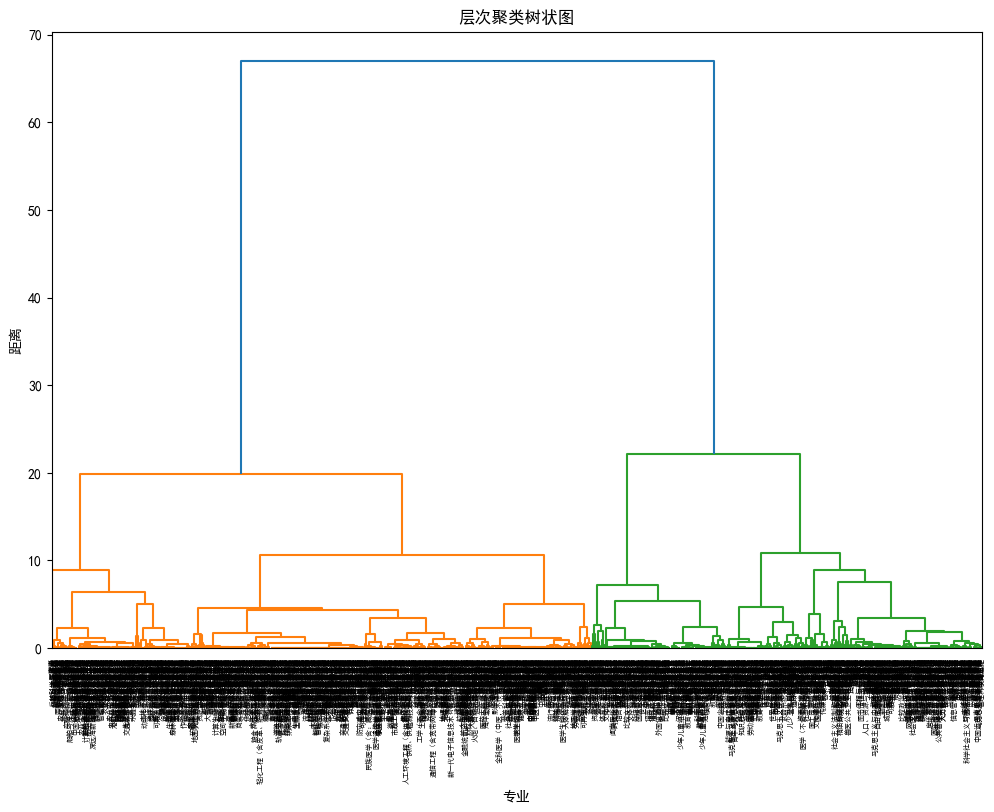

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# 按专业计算 '国家线' 和其他四个线（'英语线', '政治线', '数学线', '专业线'）的平均值
avg_scores = data.groupby('专业')[['国家线', '英语线', '政治线', '数学线', '专业线']].mean()

# 获取国家线和其他四个线的平均值
x = avg_scores['国家线'].values.reshape(-1, 1)  # 国家线
y = avg_scores[['英语线', '政治线', '数学线', '专业线']].mean(axis=1).values.reshape(-1, 1)  # 四个线的平均值

# 合并 x 和 y 为一个新的特征矩阵
X = np.hstack((x, y))  # 将国家线和其他四个线的平均值合并为一个二维数组

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 计算层次聚类的链接矩阵（linkage matrix）
Z = linkage(X_scaled, method='ward')  # 'ward' 方法是最常用的，尽量保持每次合并后的簇内方差最小

# 绘制树状图
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=avg_scores.index.to_list(), orientation='top', leaf_rotation=90)
plt.title('层次聚类树状图')
plt.xlabel('专业')
plt.ylabel('距离')
plt.show()


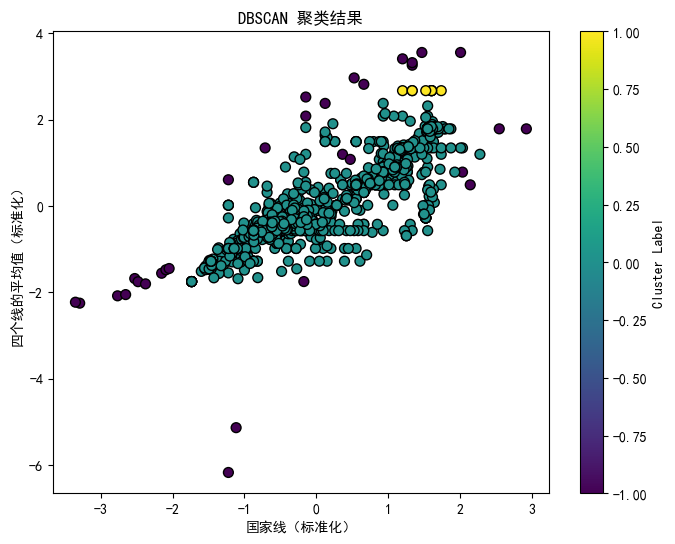

不同标签: [-1  0  1]
类别 -1: 31 points
类别 0: 1521 points
类别 1: 9 points


In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 按专业计算 '国家线' 和其他四个线（'英语线', '政治线', '数学线', '专业线'）的平均值
avg_scores = data.groupby('专业')[['国家线', '英语线', '政治线', '数学线', '专业线']].mean()

# 获取国家线和其他四个线的平均值
x = avg_scores['国家线'].values.reshape(-1, 1)  # 国家线
y = avg_scores[['英语线', '政治线', '数学线', '专业线']].mean(axis=1).values.reshape(-1, 1)  # 四个线的平均值

# 合并 x 和 y 为一个新的特征矩阵
X = np.hstack((x, y))  # 将国家线和其他四个线的平均值合并为一个二维数组

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用 DBSCAN 进行聚类
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('DBSCAN 聚类结果')
plt.xlabel('国家线（标准化）')
plt.ylabel('四个线的平均值（标准化）')
plt.colorbar(label='Cluster Label')  # 显示聚类标签
plt.show()

# 查看每个簇的数量
unique_labels = np.unique(labels)
print(f"不同标签: {unique_labels}")
for label in unique_labels:
    print(f"类别 {label}: {np.sum(labels == label)} points")
